In [133]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import dynamic_tsne
from importlib import reload
reload(dynamic_tsne)  # Rerun this cell after update
%matplotlib inline

We are going to use mainly 2 datasets for illustration: iris dataset [ref] and 8x8 digit pictures dataset [ref].
 - Iris dataset is a popular example dataset for classification. It contains petal length, petal width, sepal length and sepal width of the iris flower, and has the type of flower as expected output (setosa, versicolor or virginica).
 - Written digits, represented as 8x8 images. Each pixel is a grayscale value between 0 and 1, where 0 means white, 1 means black, and values between are shades of gray.
 
Both datasets were taken from scikit-learn [ref] package.

In [134]:
# Load data
data_digits = datasets.load_digits()
X_digits = data_digits.images.reshape((-1, 64)) # 8x8 image to 64-length vector
labels_digits = data_digits.target

In [135]:
# Run TSNE
dTSNE_digits = dynamic_tsne.DynamicTSNE(perplexity=20)
Y_digits = dTSNE_digits.fit(X_digits, optimizer_kwargs={'momentum': 0.8, 'n_iter': 1000}, random_seed=1)

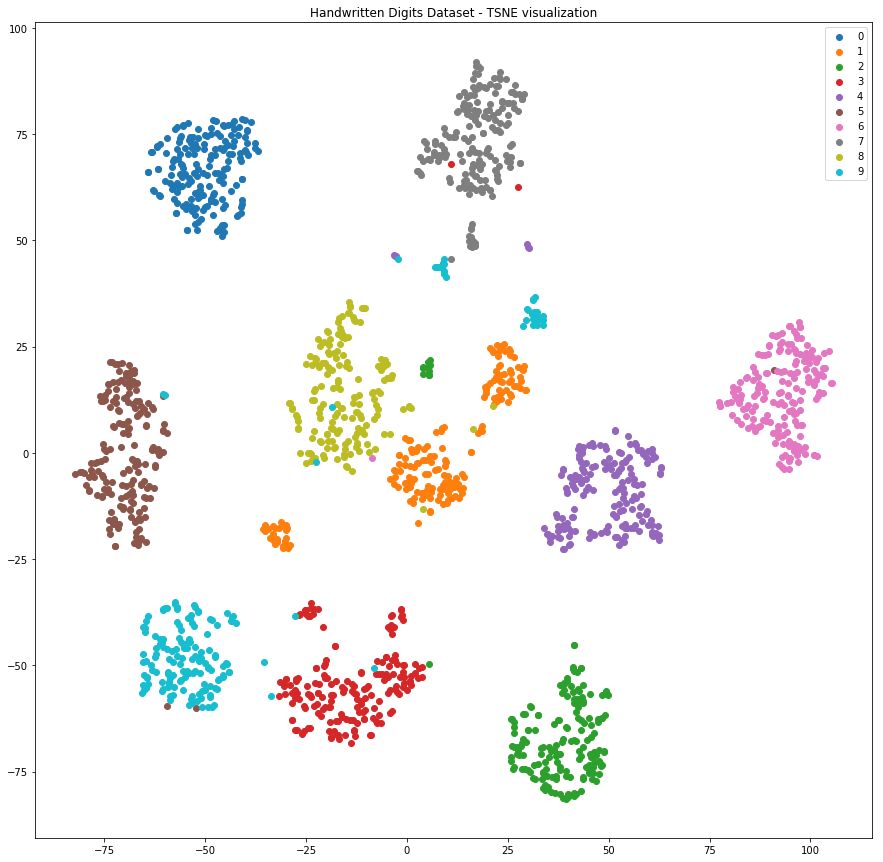

In [136]:
plt.gcf().set_size_inches(15,15)
legend_list = list()
for l in set(sorted(labels_digits)):
    plt.scatter(Y_digits[labels_digits == l, 0], Y_digits[labels_digits == l, 1])
    legend_list.append(str(data_digits.target_names[l]))
plt.title("Handwritten Digits Dataset - TSNE visualization")
plt.legend(legend_list)
plt.show()

In [137]:
data_iris = datasets.load_iris()
X_iris = data_iris.data
labels_iris = data_iris.target

# Keeping only unique rows. There is way easier method in numpy 1.13
temp = np.ascontiguousarray(X_iris).view(np.dtype((np.void, X_iris.dtype.itemsize * X_iris.shape[1])))
_, unique_idx = np.unique(temp, return_index=True)

X_iris = X_iris[unique_idx, :]
labels_iris = labels_iris[unique_idx]

In [138]:
dTSNE_iris = dynamic_tsne.DynamicTSNE(perplexity=20)
# Small dataset. Iterations are very fast, we can afford more
Y_iris = dTSNE_iris.fit(X_iris, verbose=0, optimizer_kwargs={'momentum': 0.8, 'n_iter' : 3000}, random_seed=1)

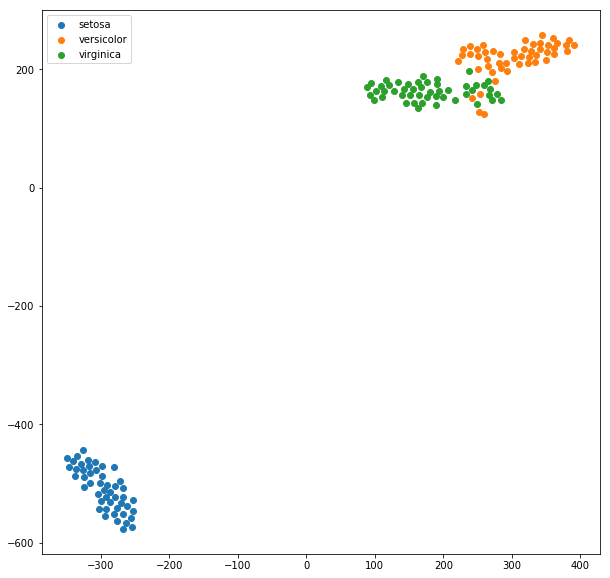

In [139]:
plt.gcf().set_size_inches(10, 10)
legend_list = list()
for l in set(sorted(labels_iris)):
    plt.scatter(Y_iris[labels_iris == l, 0], Y_iris[labels_iris == l, 1])
    legend_list.append(str(data_iris.target_names[l]))
plt.legend(legend_list)
plt.show()

One of the main limitation of TSNE is that it is essentially a one-shot method: once transformation is done, algorithm is not designed to incorporate new data. There are two exaple scenarios where that limitation can come into play:
- Additional examples appearing. If we receive new digit, where should it be in the map? If there is a new iris flower, where will it be? [add real-life examples]
- Dynamics. If the data changes over time, how to estimate the movement of existing data point?

## Approach 1. Refitting.

One possible option is to re-run the gradient descent for new points. [and there are a lot of tricks, TODO]

In [140]:
# TODO

We design the following test:
- Take two samples [not exactly at random for now]
- Generate linearly transform one sample to another and record the transition steps.
- Generate Y for each step using the embedding function.
- In X space transition will be linear. How will it look in Y space? [Note: it does not have to be linear]

There are no formal criteria, [we just hope for insights]

In [141]:
start_index = 0
end_index = 300
steps = 100
X_digits_transition = [X_digits[start_index, :] + (X_digits[end_index,:] - X_digits[start_index, :])*i/steps
                       for i in range(steps+1)]

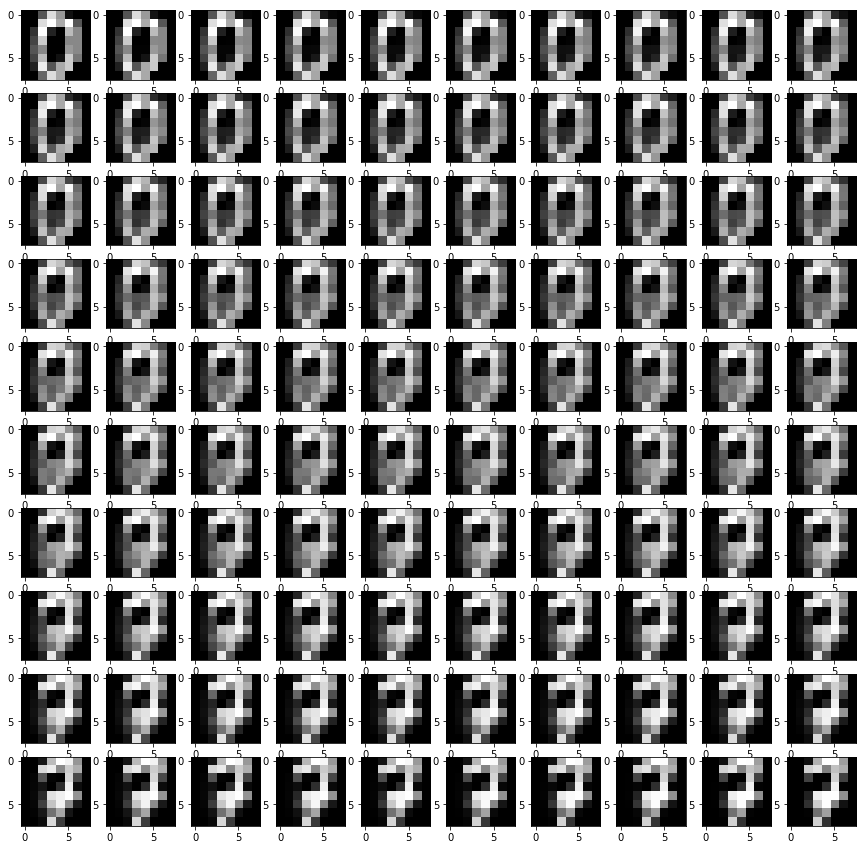

In [142]:
f, ax = plt.subplots(10,10)
f.set_size_inches(15,15)
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X_digits_transition[i*10+j].reshape(8,8), cmap = 'gray')

In [158]:
start_index = 0
end_index = 100
steps = 100
Xtransition_iris = [X_iris[start_index, :] + (X_iris[end_index,:] - X_iris[start_index, :])*i/steps
                    for i in range(steps+1)]
ytransition = [Y_iris[start_index] + (Y_iris[end_index] - Y_iris[start_index])*i/steps for i in range(steps+1)]

In [161]:
y_iris_closest = dTSNE_iris.transform(Xtransition_iris, y='closest', verbose=2, random_seed=1)
y_iris_random = dTSNE_iris.transform(Xtransition_iris, y='random', verbose=2, random_seed=1)
y_iris_linear = dTSNE_iris.transform(Xtransition_iris, y=ytransition, verbose=2, random_seed=1)

Found sigma. Average:  0.269351002881
[t-SNE] Iteration 1: error = 19.0324553, gradient norm = 0.0072559
[t-SNE] Iteration 2: error = 18.6286304, gradient norm = 0.0454092
[t-SNE] Iteration 3: error = 15.1794217, gradient norm = 0.0480553
[t-SNE] Iteration 4: error = 14.0598100, gradient norm = 0.0545714
[t-SNE] Iteration 5: error = 12.3050472, gradient norm = 0.0488026
[t-SNE] Iteration 6: error = 11.2769015, gradient norm = 0.0498443
[t-SNE] Iteration 7: error = 11.1862340, gradient norm = 0.0643860
[t-SNE] Iteration 8: error = 10.9230202, gradient norm = 0.0569750
[t-SNE] Iteration 9: error = 10.9839461, gradient norm = 0.0520028
[t-SNE] Iteration 10: error = 10.6955931, gradient norm = 0.0626566
[t-SNE] Iteration 11: error = 10.7628215, gradient norm = 0.0495907
[t-SNE] Iteration 12: error = 11.0456937, gradient norm = 0.0607522
[t-SNE] Iteration 13: error = 10.9002360, gradient norm = 0.0573220
[t-SNE] Iteration 14: error = 10.8576399, gradient norm = 0.0489127
[t-SNE] Iteration 1

[t-SNE] Iteration 146: error = 0.9130098, gradient norm = 0.0004381
[t-SNE] Iteration 147: error = 0.9098539, gradient norm = 0.0004376
[t-SNE] Iteration 148: error = 0.9070478, gradient norm = 0.0004210
[t-SNE] Iteration 149: error = 0.9049132, gradient norm = 0.0004878
[t-SNE] Iteration 150: error = 0.9032131, gradient norm = 0.0006591
[t-SNE] Iteration 151: error = 0.9022365, gradient norm = 0.0008448
[t-SNE] Iteration 152: error = 0.8994923, gradient norm = 0.0005351
[t-SNE] Iteration 153: error = 0.8976480, gradient norm = 0.0005964
[t-SNE] Iteration 154: error = 0.8952607, gradient norm = 0.0004278
[t-SNE] Iteration 155: error = 0.8931293, gradient norm = 0.0004380
[t-SNE] Iteration 156: error = 0.8910387, gradient norm = 0.0004558
[t-SNE] Iteration 157: error = 0.8889943, gradient norm = 0.0004863
[t-SNE] Iteration 158: error = 0.8867948, gradient norm = 0.0004053
[t-SNE] Iteration 159: error = 0.8847766, gradient norm = 0.0003825
[t-SNE] Iteration 160: error = 0.8828328, gradie

[t-SNE] Iteration 290: error = 0.6954820, gradient norm = 0.0002245
[t-SNE] Iteration 291: error = 0.6944006, gradient norm = 0.0002371
[t-SNE] Iteration 292: error = 0.6931712, gradient norm = 0.0002556
[t-SNE] Iteration 293: error = 0.6917507, gradient norm = 0.0002768
[t-SNE] Iteration 294: error = 0.6900999, gradient norm = 0.0003000
[t-SNE] Iteration 295: error = 0.6881678, gradient norm = 0.0003208
[t-SNE] Iteration 296: error = 0.6859416, gradient norm = 0.0003391
[t-SNE] Iteration 297: error = 0.6834930, gradient norm = 0.0003469
[t-SNE] Iteration 298: error = 0.6808563, gradient norm = 0.0003726
[t-SNE] Iteration 299: error = 0.6781289, gradient norm = 0.0003449
[t-SNE] Iteration 300: error = 0.6758594, gradient norm = 0.0003271
[t-SNE] Iteration 301: error = 0.6740646, gradient norm = 0.0005094
[t-SNE] Iteration 302: error = 0.6726883, gradient norm = 0.0006808
[t-SNE] Iteration 303: error = 0.6717820, gradient norm = 0.0010385
[t-SNE] Iteration 304: error = 0.6699716, gradie

[t-SNE] Iteration 435: error = 0.6423543, gradient norm = 0.0000205
[t-SNE] Iteration 436: error = 0.6423429, gradient norm = 0.0000211
[t-SNE] Iteration 437: error = 0.6423318, gradient norm = 0.0000227
[t-SNE] Iteration 438: error = 0.6423210, gradient norm = 0.0000220
[t-SNE] Iteration 439: error = 0.6423102, gradient norm = 0.0000213
[t-SNE] Iteration 440: error = 0.6422998, gradient norm = 0.0000190
[t-SNE] Iteration 441: error = 0.6422898, gradient norm = 0.0000195
[t-SNE] Iteration 442: error = 0.6422801, gradient norm = 0.0000193
[t-SNE] Iteration 443: error = 0.6422706, gradient norm = 0.0000210
[t-SNE] Iteration 444: error = 0.6422614, gradient norm = 0.0000201
[t-SNE] Iteration 445: error = 0.6422526, gradient norm = 0.0000234
[t-SNE] Iteration 446: error = 0.6422438, gradient norm = 0.0000207
[t-SNE] Iteration 447: error = 0.6422353, gradient norm = 0.0000221
[t-SNE] Iteration 448: error = 0.6422271, gradient norm = 0.0000183
[t-SNE] Iteration 449: error = 0.6422193, gradie

[t-SNE] Iteration 572: error = 0.6418462, gradient norm = 0.0000069
[t-SNE] Iteration 573: error = 0.6418452, gradient norm = 0.0000072
[t-SNE] Iteration 574: error = 0.6418441, gradient norm = 0.0000069
[t-SNE] Iteration 575: error = 0.6418431, gradient norm = 0.0000078
[t-SNE] Iteration 576: error = 0.6418420, gradient norm = 0.0000065
[t-SNE] Iteration 577: error = 0.6418410, gradient norm = 0.0000066
[t-SNE] Iteration 578: error = 0.6418400, gradient norm = 0.0000060
[t-SNE] Iteration 579: error = 0.6418391, gradient norm = 0.0000060
[t-SNE] Iteration 580: error = 0.6418381, gradient norm = 0.0000060
[t-SNE] Iteration 581: error = 0.6418372, gradient norm = 0.0000059
[t-SNE] Iteration 582: error = 0.6418362, gradient norm = 0.0000060
[t-SNE] Iteration 583: error = 0.6418353, gradient norm = 0.0000060
[t-SNE] Iteration 584: error = 0.6418343, gradient norm = 0.0000059
[t-SNE] Iteration 585: error = 0.6418334, gradient norm = 0.0000061
[t-SNE] Iteration 586: error = 0.6418325, gradie

[t-SNE] Iteration 709: error = 0.6417729, gradient norm = 0.0000033
[t-SNE] Iteration 710: error = 0.6417727, gradient norm = 0.0000035
[t-SNE] Iteration 711: error = 0.6417724, gradient norm = 0.0000034
[t-SNE] Iteration 712: error = 0.6417722, gradient norm = 0.0000034
[t-SNE] Iteration 713: error = 0.6417720, gradient norm = 0.0000033
[t-SNE] Iteration 714: error = 0.6417718, gradient norm = 0.0000030
[t-SNE] Iteration 715: error = 0.6417716, gradient norm = 0.0000030
[t-SNE] Iteration 716: error = 0.6417713, gradient norm = 0.0000029
[t-SNE] Iteration 717: error = 0.6417711, gradient norm = 0.0000030
[t-SNE] Iteration 718: error = 0.6417709, gradient norm = 0.0000029
[t-SNE] Iteration 719: error = 0.6417707, gradient norm = 0.0000030
[t-SNE] Iteration 720: error = 0.6417705, gradient norm = 0.0000031
[t-SNE] Iteration 721: error = 0.6417703, gradient norm = 0.0000033
[t-SNE] Iteration 722: error = 0.6417701, gradient norm = 0.0000033
[t-SNE] Iteration 723: error = 0.6417699, gradie

[t-SNE] Iteration 43: error = 12.7305585, gradient norm = 0.0856518
[t-SNE] Iteration 44: error = 12.6443062, gradient norm = 0.0698922
[t-SNE] Iteration 45: error = 12.1313289, gradient norm = 0.0104554
[t-SNE] Iteration 46: error = 12.4248091, gradient norm = 0.0825021
[t-SNE] Iteration 47: error = 12.2865800, gradient norm = 0.0628196
[t-SNE] Iteration 48: error = 12.2410600, gradient norm = 0.0202942
[t-SNE] Iteration 49: error = 12.1012184, gradient norm = 0.0071340
[t-SNE] Iteration 50: error = 12.1839252, gradient norm = 0.0090918
[t-SNE] Iteration 51: error = 12.2222036, gradient norm = 0.0104698
[t-SNE] Iteration 52: error = 12.2262939, gradient norm = 0.0103236
[t-SNE] Iteration 53: error = 12.3010537, gradient norm = 0.0120364
[t-SNE] Iteration 54: error = 12.2855497, gradient norm = 0.0206949
[t-SNE] Iteration 55: error = 12.2540084, gradient norm = 0.0117298
[t-SNE] Iteration 56: error = 12.2436909, gradient norm = 0.0123506
[t-SNE] Iteration 57: error = 12.3804225, gradie

[t-SNE] Iteration 172: error = 1.3407504, gradient norm = 0.0005051
[t-SNE] Iteration 173: error = 1.3357585, gradient norm = 0.0005196
[t-SNE] Iteration 174: error = 1.3304522, gradient norm = 0.0005205
[t-SNE] Iteration 175: error = 1.3251154, gradient norm = 0.0005065
[t-SNE] Iteration 176: error = 1.3200699, gradient norm = 0.0005277
[t-SNE] Iteration 177: error = 1.3150313, gradient norm = 0.0004985
[t-SNE] Iteration 178: error = 1.3102199, gradient norm = 0.0004692
[t-SNE] Iteration 179: error = 1.3059590, gradient norm = 0.0004603
[t-SNE] Iteration 180: error = 1.3019802, gradient norm = 0.0004377
[t-SNE] Iteration 181: error = 1.2981525, gradient norm = 0.0004210
[t-SNE] Iteration 182: error = 1.2945075, gradient norm = 0.0004043
[t-SNE] Iteration 183: error = 1.2910403, gradient norm = 0.0004014
[t-SNE] Iteration 184: error = 1.2876524, gradient norm = 0.0004066
[t-SNE] Iteration 185: error = 1.2842410, gradient norm = 0.0004070
[t-SNE] Iteration 186: error = 1.2808013, gradie

[t-SNE] Iteration 300: error = 0.8749258, gradient norm = 0.0004196
[t-SNE] Iteration 301: error = 0.8712526, gradient norm = 0.0004136
[t-SNE] Iteration 302: error = 0.8676318, gradient norm = 0.0004335
[t-SNE] Iteration 303: error = 0.8638413, gradient norm = 0.0004226
[t-SNE] Iteration 304: error = 0.8601498, gradient norm = 0.0004139
[t-SNE] Iteration 305: error = 0.8565550, gradient norm = 0.0004315
[t-SNE] Iteration 306: error = 0.8527543, gradient norm = 0.0004396
[t-SNE] Iteration 307: error = 0.8488483, gradient norm = 0.0004142
[t-SNE] Iteration 308: error = 0.8453477, gradient norm = 0.0004074
[t-SNE] Iteration 309: error = 0.8422158, gradient norm = 0.0003723
[t-SNE] Iteration 310: error = 0.8393926, gradient norm = 0.0003870
[t-SNE] Iteration 311: error = 0.8366289, gradient norm = 0.0003920
[t-SNE] Iteration 312: error = 0.8337949, gradient norm = 0.0003941
[t-SNE] Iteration 313: error = 0.8307335, gradient norm = 0.0003751
[t-SNE] Iteration 314: error = 0.8274850, gradie

[t-SNE] Iteration 87: error = 1.6910628, gradient norm = 0.0005919
[t-SNE] Iteration 88: error = 1.6865598, gradient norm = 0.0005847
[t-SNE] Iteration 89: error = 1.6820680, gradient norm = 0.0005771
[t-SNE] Iteration 90: error = 1.6776157, gradient norm = 0.0005721
[t-SNE] Iteration 91: error = 1.6731881, gradient norm = 0.0005727
[t-SNE] Iteration 92: error = 1.6687117, gradient norm = 0.0005752
[t-SNE] Iteration 93: error = 1.6641324, gradient norm = 0.0005729
[t-SNE] Iteration 94: error = 1.6594739, gradient norm = 0.0005713
[t-SNE] Iteration 95: error = 1.6547517, gradient norm = 0.0005700
[t-SNE] Iteration 96: error = 1.6499897, gradient norm = 0.0005651
[t-SNE] Iteration 97: error = 1.6452493, gradient norm = 0.0005582
[t-SNE] Iteration 98: error = 1.6405641, gradient norm = 0.0005532
[t-SNE] Iteration 99: error = 1.6359161, gradient norm = 0.0005531
[t-SNE] Iteration 100: error = 1.6312497, gradient norm = 0.0005475
[t-SNE] Iteration 101: error = 1.6265654, gradient norm = 0.0

[t-SNE] Iteration 216: error = 1.2151583, gradient norm = 0.0003581
[t-SNE] Iteration 217: error = 1.2115867, gradient norm = 0.0003044
[t-SNE] Iteration 218: error = 1.2083876, gradient norm = 0.0003019
[t-SNE] Iteration 219: error = 1.2053619, gradient norm = 0.0002845
[t-SNE] Iteration 220: error = 1.2023289, gradient norm = 0.0002837
[t-SNE] Iteration 221: error = 1.1992035, gradient norm = 0.0002745
[t-SNE] Iteration 222: error = 1.1961221, gradient norm = 0.0002894
[t-SNE] Iteration 223: error = 1.1928665, gradient norm = 0.0002784
[t-SNE] Iteration 224: error = 1.1899080, gradient norm = 0.0002365
[t-SNE] Iteration 225: error = 1.1874090, gradient norm = 0.0002416
[t-SNE] Iteration 226: error = 1.1849814, gradient norm = 0.0002527
[t-SNE] Iteration 227: error = 1.1824080, gradient norm = 0.0002476
[t-SNE] Iteration 228: error = 1.1797064, gradient norm = 0.0002469
[t-SNE] Iteration 229: error = 1.1768686, gradient norm = 0.0002497
[t-SNE] Iteration 230: error = 1.1738670, gradie

[t-SNE] Iteration 343: error = 0.9177122, gradient norm = 0.0003832
[t-SNE] Iteration 344: error = 0.9174584, gradient norm = 0.0003906
[t-SNE] Iteration 345: error = 0.9157691, gradient norm = 0.0004941
[t-SNE] Iteration 346: error = 0.9133341, gradient norm = 0.0005150
[t-SNE] Iteration 347: error = 0.9105716, gradient norm = 0.0006070
[t-SNE] Iteration 348: error = 0.9071218, gradient norm = 0.0003821
[t-SNE] Iteration 349: error = 0.9043149, gradient norm = 0.0003960
[t-SNE] Iteration 350: error = 0.9014907, gradient norm = 0.0003679
[t-SNE] Iteration 351: error = 0.8985776, gradient norm = 0.0003756
[t-SNE] Iteration 352: error = 0.8956242, gradient norm = 0.0003765
[t-SNE] Iteration 353: error = 0.8925836, gradient norm = 0.0003570
[t-SNE] Iteration 354: error = 0.8895095, gradient norm = 0.0003355
[t-SNE] Iteration 355: error = 0.8864245, gradient norm = 0.0003279
[t-SNE] Iteration 356: error = 0.8833087, gradient norm = 0.0003260
[t-SNE] Iteration 357: error = 0.8801089, gradie

[t-SNE] Iteration 464: error = 0.7066761, gradient norm = 0.0001242
[t-SNE] Iteration 465: error = 0.7061178, gradient norm = 0.0001261
[t-SNE] Iteration 466: error = 0.7055356, gradient norm = 0.0001261
[t-SNE] Iteration 467: error = 0.7049307, gradient norm = 0.0001266
[t-SNE] Iteration 468: error = 0.7043032, gradient norm = 0.0001278
[t-SNE] Iteration 469: error = 0.7036501, gradient norm = 0.0001287
[t-SNE] Iteration 470: error = 0.7029705, gradient norm = 0.0001296
[t-SNE] Iteration 471: error = 0.7022634, gradient norm = 0.0001308
[t-SNE] Iteration 472: error = 0.7015274, gradient norm = 0.0001320
[t-SNE] Iteration 473: error = 0.7007613, gradient norm = 0.0001333
[t-SNE] Iteration 474: error = 0.6999635, gradient norm = 0.0001348
[t-SNE] Iteration 475: error = 0.6991322, gradient norm = 0.0001364
[t-SNE] Iteration 476: error = 0.6982658, gradient norm = 0.0001383
[t-SNE] Iteration 477: error = 0.6973627, gradient norm = 0.0001404
[t-SNE] Iteration 478: error = 0.6964208, gradie

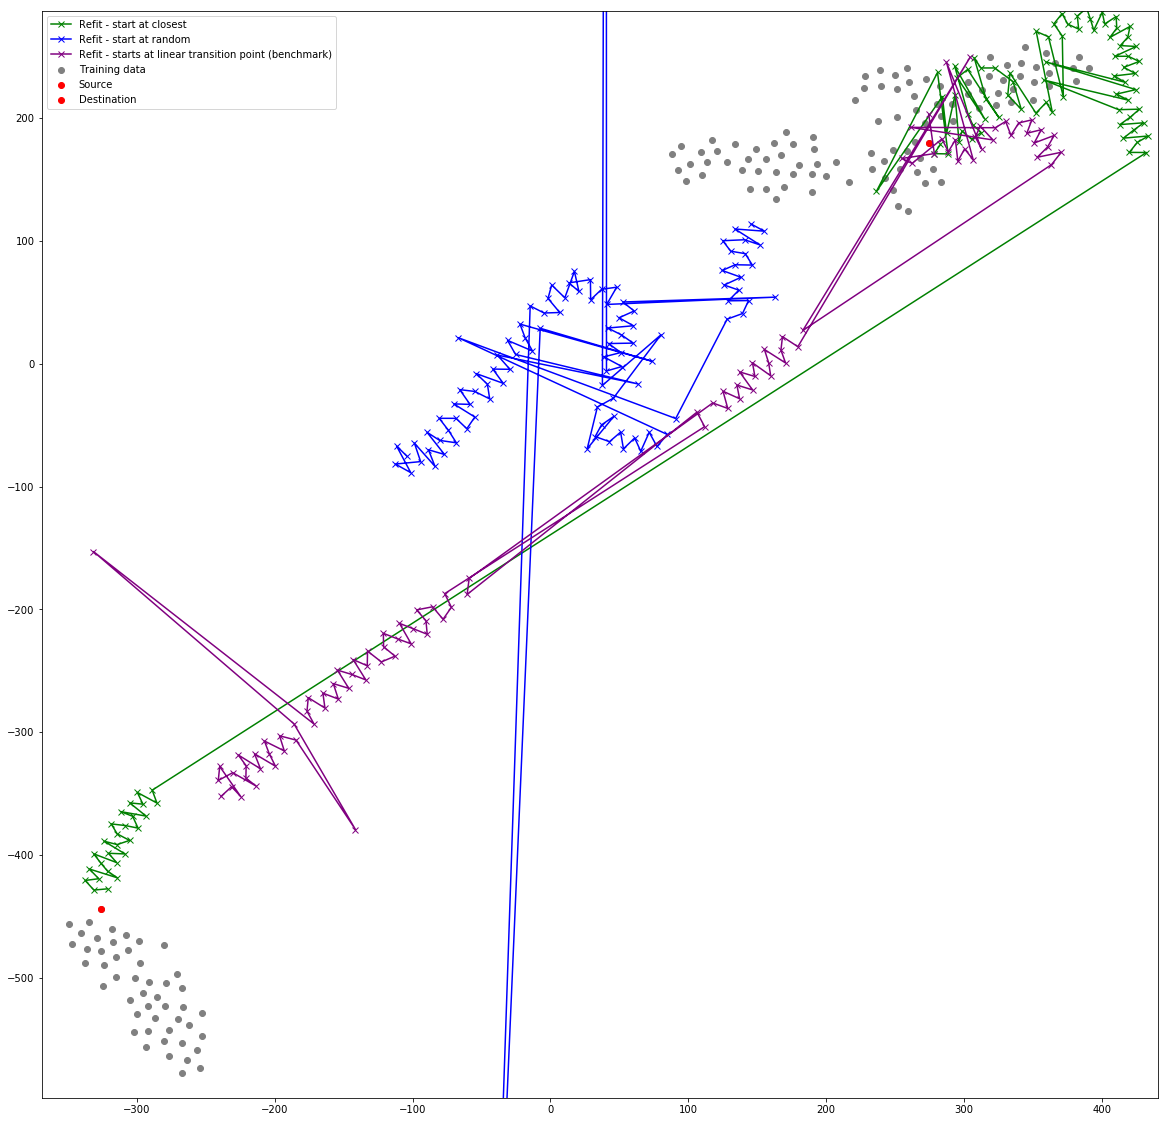

In [171]:
plt.gcf().set_size_inches(20, 20)
legend_list = list()
plt.scatter(Y_iris[:, 0], Y_iris[:, 1], c='gray')
plt.scatter(Y_iris[0, 0], Y_iris[0, 1], c='red')
plt.scatter(Y_iris[100, 0], Y_iris[100, 1], c='red')

plt.plot(y_iris_closest[:, 0], y_iris_closest[:, 1], color='green', marker='x')
legend_list.append("Refit - start at closest")
plt.plot(y_iris_random[:, 0], y_iris_random[:, 1], color='blue', marker = 'x')
legend_list.append("Refit - start at random")
plt.plot(y_iris_linear[:, 0], y_iris_linear[:, 1], color='purple', marker = 'x')
legend_list.append("Refit - starts at linear transition point (benchmark)")

legend_list.append("Training data")
legend_list.append("Source")
legend_list.append("Destination")

plt.xlim([np.min(Y_iris[:, 0])-20, np.max(Y_iris[:, 0])+50])
plt.ylim([np.min(Y_iris[:, 1])-20, np.max(Y_iris[:, 1])+30])
plt.legend(legend_list)
plt.show()

Problems:
- Lack of consistency
[Many others]

## Approach 2. Creating Embedding Function

Ap possible method is to generate a function f(x) -> y. Function takes a sample in original dimensions, and returns its representation in reduced dimensions.

There are several requirements for embedding function [depends on exact scenario]:
   - Continuity. There should be no sudden jumps. Small changes of *x* should correspond to small changes of *y*.
   - Consistency. If an input *x* is the same as one of training data examples, the function should return the same y. It is especially important in dynamics - if the value stayed the same, it should not be perceived as moving. 
   - [more?]

[We propose folloing methods] :
- Lagrange polynomial based on norms [Lagrange-like polynomial with norms to account for multiple diemnsions]
- Piecewise-linear interpolation [name says it all]
- Weighted inverse distance interpolation [weighted sum of Y_i, where weight is equal to normalized inverse distance
between *x* and X_i training sample]

In [143]:
# Just for intuition, here is how those interploations look like
x_1d = np.array([[10],[20],[30],[40]])
y_1d = np.array([[10],[40],[30],[50]])
simple_example_model = dynamic_tsne.DynamicTSNE(perplexity=2)
simple_example_model.incorporate(x_1d, y_1d)

In [144]:
embedder_poly_1d = simple_example_model.generate_embedding_function(embedding_function_type='makeshift-lagrange-norm')
embedder_weighted_1d = simple_example_model.generate_embedding_function(embedding_function_type='weighted-inverse-distance')
embedder_linear_1d = simple_example_model.generate_embedding_function(embedding_function_type='linear')

In [145]:
x = np.arange(5,45,0.1).reshape((-1,1))
xl = np.arange(10,40,0.1).reshape((-1,1))
y_poly = embedder_poly_1d(x)
y_weighted = embedder_weighted_1d(x)
y_linear = embedder_linear_1d(xl)

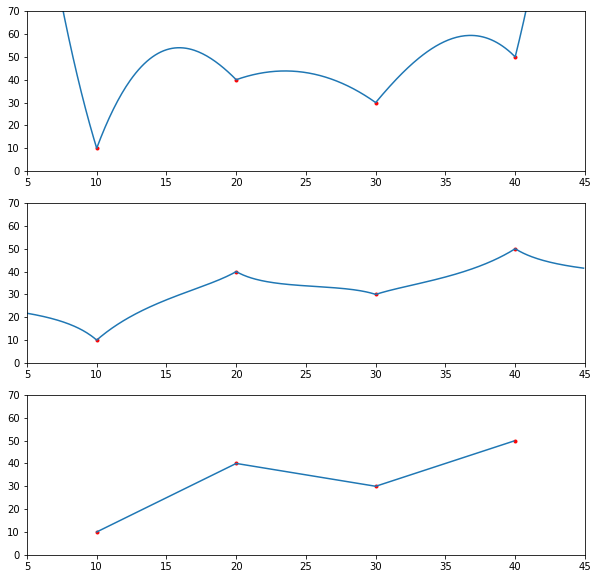

In [146]:
f, ax = plt.subplots(3,1)
f.set_size_inches(10,10)
ax[0].plot(x,y_poly)
ax[0].scatter(x_1d,y_1d,c='red',marker='.')
ax[0].set_ylim([0,70])
ax[0].set_xlim([5,45])
ax[1].plot(x,y_weighted)
ax[1].set_ylim([0,70])
ax[1].set_xlim([5,45])
ax[1].scatter(x_1d,y_1d,c='red',marker='.')
ax[2].plot(xl,y_linear)
ax[2].set_ylim([0,70])
ax[2].set_xlim([5,45])
ax[2].scatter(x_1d,y_1d,c='red',marker='.')

In [148]:
embedder_poly = dTSNE_digits.generate_embedding_function(embedding_function_type='makeshift-lagrange-norm')
embedder_weighted_one = dTSNE_digits.generate_embedding_function(embedding_function_type='weighted-inverse-distance')
embedder_weighted_half = dTSNE_digits.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 0.5})
embedder_weighted_2 = dTSNE_digits.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 2})
embedder_weighted_3 = dTSNE_digits.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 3})
embedder_weighted_10 = dTSNE_digits.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 10})
embedder_weighted_20 = dTSNE_digits.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 20})
#embedder_linear = dTSNE_digits.generate_embedding_function(embedding_function_type='linear')

In [149]:
#y_poly = embedder_poly(X_digits_transition, verbose = 2)
y_w_1 = embedder_weighted_one(X_digits_transition)
y_w_half = embedder_weighted_half(X_digits_transition)

In [ ]:
y_w_2 = embedder_weighted_2(X_digits_transition)
y_w_3 = embedder_weighted_3(X_digits_transition)
y_w_10 = embedder_weighted_10(X_digits_transition)
y_w_20 = embedder_weighted_20(X_digits_transition)
#y_linear = embedder_linear(X_digits_transition)

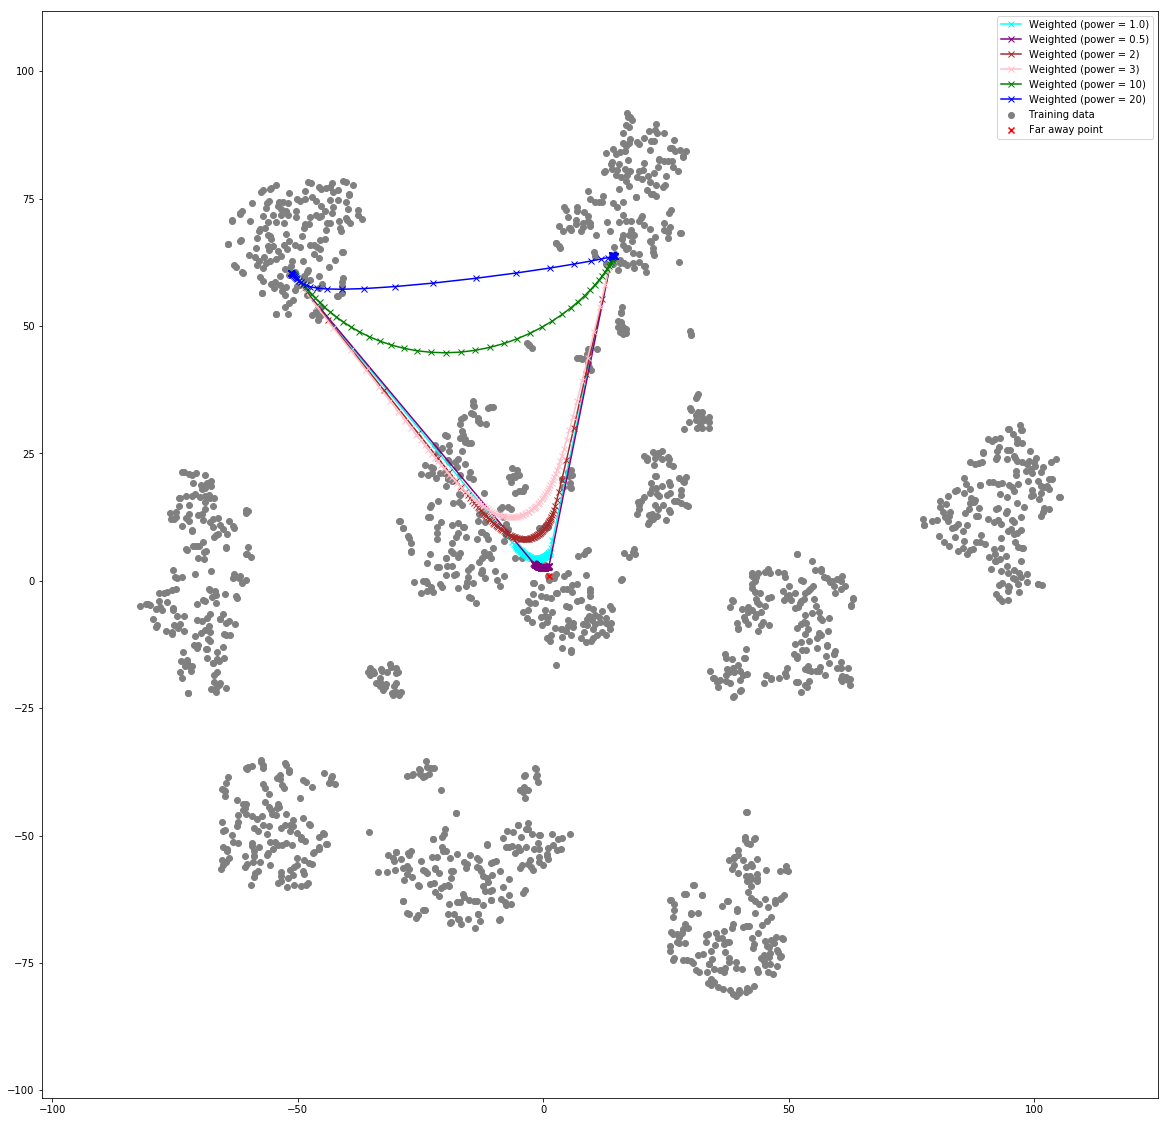

In [150]:
plt.gcf().set_size_inches(20, 20)
legend_list = list()
plt.scatter(Y_digits[:, 0], Y_digits[:, 1], c='gray')

X_far = [100]*64
y_far = embedder_weighted_one(X_far)

plt.scatter(y_far[:, 0], y_far[:, 1], c='red',marker='x')

#plt.plot(y_poly[:, 0], y_poly[:, 1], color='red', marker='x')
#legend_list.append("Polynomial interpolation")
plt.plot(y_w_1[:, 0], y_w_1[:, 1], color='cyan', marker = 'x')
legend_list.append("Weighted (power = 1.0)")
plt.plot(y_w_half[:, 0], y_w_half[:, 1], color='purple', marker = 'x')
legend_list.append("Weighted (power = 0.5)")
plt.plot(y_w_2[:, 0], y_w_2[:, 1], color='brown', marker = 'x')
legend_list.append("Weighted (power = 2)")
plt.plot(y_w_3[:, 0], y_w_3[:, 1], color='pink', marker = 'x')
legend_list.append("Weighted (power = 3)")
plt.plot(y_w_10[:, 0], y_w_10[:, 1], color='green', marker = 'x')
legend_list.append("Weighted (power = 10)")
plt.plot(y_w_20[:, 0], y_w_20[:, 1], color='blue', marker = 'x')
legend_list.append("Weighted (power = 20)")
#plt.plot(y_linear[:, 0], y_linear[:, 1], color='black', marker = 'x')
#legend_list.append("Linear")


legend_list.append("Training data")
legend_list.append("Far away point")

plt.xlim([np.min(Y_digits[:, 0])-20, np.max(Y_digits[:, 0])+20])
plt.ylim([np.min(Y_digits[:, 1])-20, np.max(Y_digits[:, 1])+20])
plt.legend(legend_list)
plt.show()

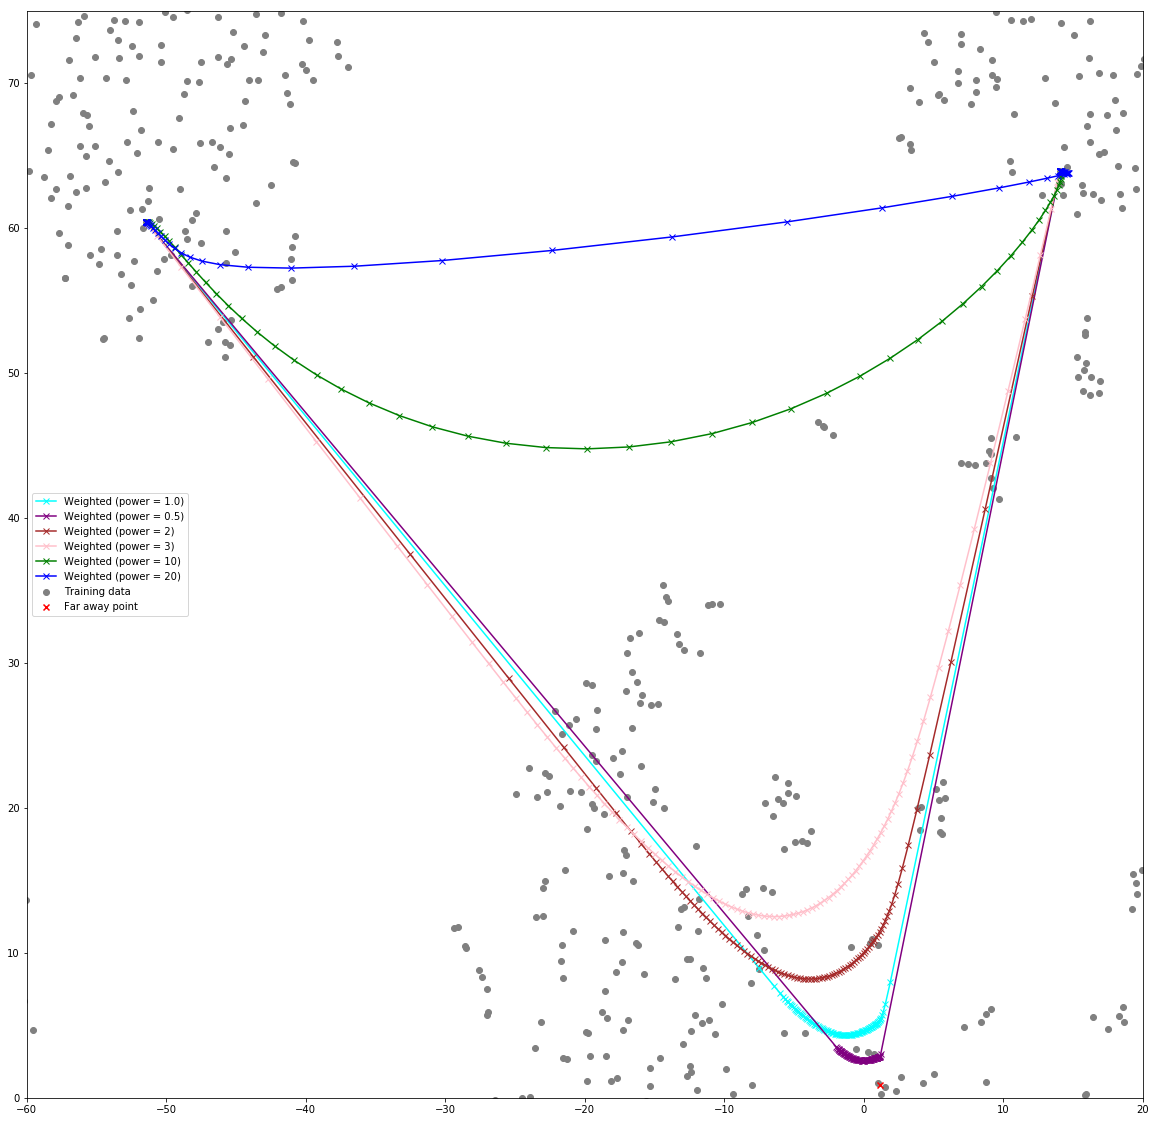

In [152]:
plt.gcf().set_size_inches(20, 20)
legend_list = list()
plt.scatter(Y_digits[:, 0], Y_digits[:, 1], c='gray')

X_far = [100]*64
y_far = embedder_weighted_one(X_far)

plt.scatter(y_far[:, 0], y_far[:, 1], c='red',marker='x')

#plt.plot(y_poly[:, 0], y_poly[:, 1], color='red', marker='x')
#legend_list.append("Polynomial interpolation")
plt.plot(y_w_1[:, 0], y_w_1[:, 1], color='cyan', marker = 'x')
legend_list.append("Weighted (power = 1.0)")
plt.plot(y_w_half[:, 0], y_w_half[:, 1], color='purple', marker = 'x')
legend_list.append("Weighted (power = 0.5)")
plt.plot(y_w_2[:, 0], y_w_2[:, 1], color='brown', marker = 'x')
legend_list.append("Weighted (power = 2)")
plt.plot(y_w_3[:, 0], y_w_3[:, 1], color='pink', marker = 'x')
legend_list.append("Weighted (power = 3)")
plt.plot(y_w_10[:, 0], y_w_10[:, 1], color='green', marker = 'x')
legend_list.append("Weighted (power = 10)")
plt.plot(y_w_20[:, 0], y_w_20[:, 1], color='blue', marker = 'x')
legend_list.append("Weighted (power = 20)")
#plt.plot(y_linear[:, 0], y_linear[:, 1], color='black', marker = 'x')
#legend_list.append("Linear")


legend_list.append("Training data")
legend_list.append("Far away point")

plt.xlim([-60, 20])
plt.ylim([0, 75])
plt.legend(legend_list)
plt.show()

[Lagrange polynomial]: **TODO** There is likely a bug
- Pro: Smooth [No, it's not. Original Largrange polynomial is, but here we have norm rather than simple subtraction. Norm is not smooth, and it is exactly not smooth at those points.]
- Con: Tends to shoot far away.
- Con: Very slow
Those cons outweights all pros.

Weighted inverse distance interpolation can produce [some strange effects]:
- "Pull-to-the-center"
- "All-marks-at-the center" or "all-marks-at-the-sides"
Those are 2 sides of the same effect.

Weighted sum of distance:
- Pro: [very configurable]
- Con: Requires carefully choosing parameter.
- Con: [bounded; far away points tend to be at the center]
- Con: [passing through clusters that it does not belong to]
Despite all cons, looks much better than polynomial.

Linear interpolation:
- [think of pros and cons]
- Con: tend to not show anything between clusters

In [153]:
embedder_poly_iris = dTSNE_iris.generate_embedding_function(embedding_function_type='makeshift-lagrange-norm')
embedder_weighted_one_iris = dTSNE_iris.generate_embedding_function(embedding_function_type='weighted-inverse-distance')
embedder_weighted_half_iris = dTSNE_iris.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 0.5})
embedder_weighted_2_iris = dTSNE_iris.generate_embedding_function(embedding_function_type='weighted-inverse-distance',
                                              function_kwargs={'power' : 2})
embedder_linear_iris = dTSNE_iris.generate_embedding_function(embedding_function_type='linear')

In [154]:
y_poly_iris = embedder_poly_iris(Xtransition_iris, verbose = 2)
y_w_1_iris = embedder_weighted_one_iris(Xtransition_iris)
y_w_half_iris = embedder_weighted_half_iris(Xtransition_iris)
y_w_2_iris = embedder_weighted_2_iris(Xtransition_iris)
y_linear_iris = embedder_linear_iris(Xtransition_iris)

makeshift-lagrange-norm: Embedding sample  0
makeshift-lagrange-norm: Embedding sample  1
makeshift-lagrange-norm: Embedding sample  2
makeshift-lagrange-norm: Embedding sample  3
makeshift-lagrange-norm: Embedding sample  4
makeshift-lagrange-norm: Embedding sample  5
makeshift-lagrange-norm: Embedding sample  6
makeshift-lagrange-norm: Embedding sample  7
makeshift-lagrange-norm: Embedding sample  8
makeshift-lagrange-norm: Embedding sample  9
makeshift-lagrange-norm: Embedding sample  10
makeshift-lagrange-norm: Embedding sample  11
makeshift-lagrange-norm: Embedding sample  12
makeshift-lagrange-norm: Embedding sample  13
makeshift-lagrange-norm: Embedding sample  14
makeshift-lagrange-norm: Embedding sample  15
makeshift-lagrange-norm: Embedding sample  16
makeshift-lagrange-norm: Embedding sample  17
makeshift-lagrange-norm: Embedding sample  18
makeshift-lagrange-norm: Embedding sample  19
makeshift-lagrange-norm: Embedding sample  20
makeshift-lagrange-norm: Embedding sample  2

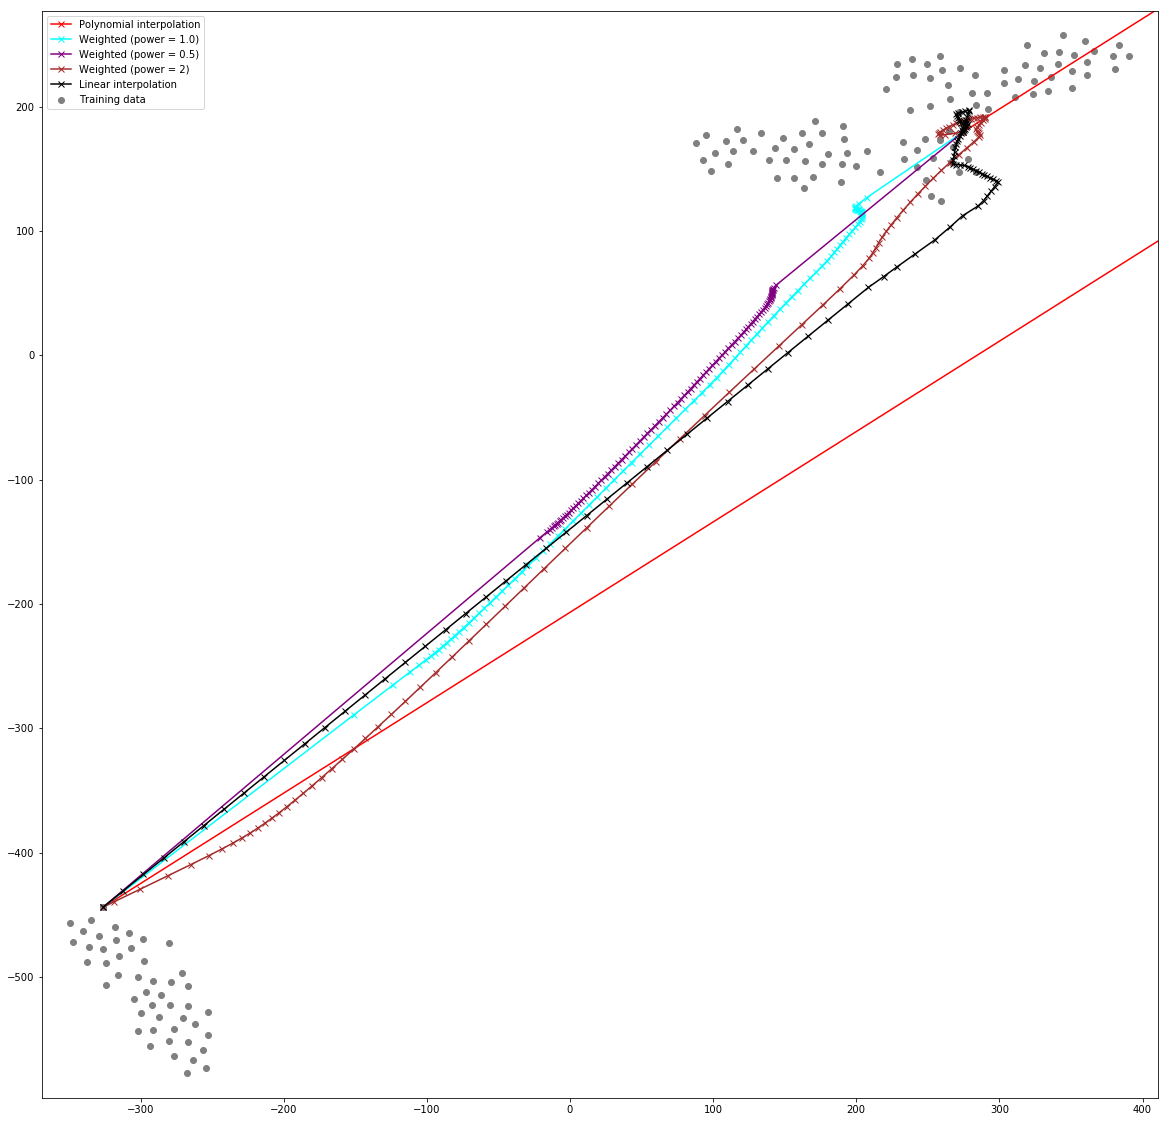

In [156]:
plt.gcf().set_size_inches(20, 20)
legend_list = list()
plt.scatter(Y_iris[:, 0], Y_iris[:, 1], c='gray')

#X_far = [100]*64
#y_far = embedder_weighted_one(X_far)

#plt.scatter(y_far[:, 0], y_far[:, 1], c='red',marker='x')

plt.plot(y_poly_iris[:, 0], y_poly_iris[:, 1], color='red', marker='x')
legend_list.append("Polynomial interpolation")
plt.plot(y_w_1_iris[:, 0], y_w_1_iris[:, 1], color='cyan', marker = 'x')
legend_list.append("Weighted (power = 1.0)")
plt.plot(y_w_half_iris[:, 0], y_w_half_iris[:, 1], color='purple', marker = 'x')
legend_list.append("Weighted (power = 0.5)")
plt.plot(y_w_2_iris[:, 0], y_w_2_iris[:, 1], color='brown', marker = 'x')
legend_list.append("Weighted (power = 2)")
plt.plot(y_linear_iris[:, 0], y_linear_iris[:, 1], color='black', marker = 'x')
legend_list.append("Linear interpolation")


legend_list.append("Training data")
legend_list.append("Far away point")

plt.xlim([np.min(Y_iris[:, 0])-20, np.max(Y_iris[:, 0])+20])
plt.ylim([np.min(Y_iris[:, 1])-20, np.max(Y_iris[:, 1])+20])
plt.legend(legend_list)
plt.show()

# MORE TESTS
- [Done] Transition test. Transofmring one sample into another. Where it will end up? How will it go? Will it pass through the clusters that it does not belong to?
- [Likely to succeed] Create a point that belongs to one of the clusters. Will it appear at the appropriate cluster?
- Create a point that does not belong to any cluster. where will it appear?
- Create a complete outlier. Where it will appear?

Use that tests as criteria. Make a table.